In [1]:
 from keras.datasets import mnist

In [2]:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_labels.shape

(60000,)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
test_labels.shape

(10000,)

In [7]:
import matplotlib.pyplot as plt

So nay la:  7


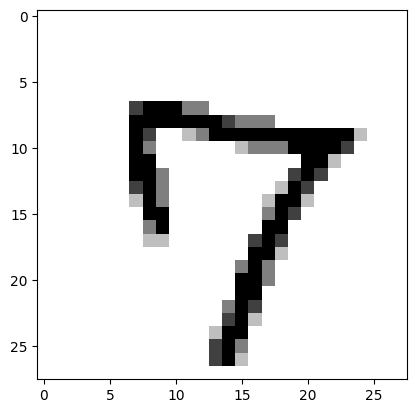

In [8]:
hinh = train_images[15460]
plt.imshow(hinh,cmap=plt.cm.binary)
plt.show
print('So nay la: ',train_labels[15460])

<ipython-input-9-83bf64c86aa0>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,5,i+1)


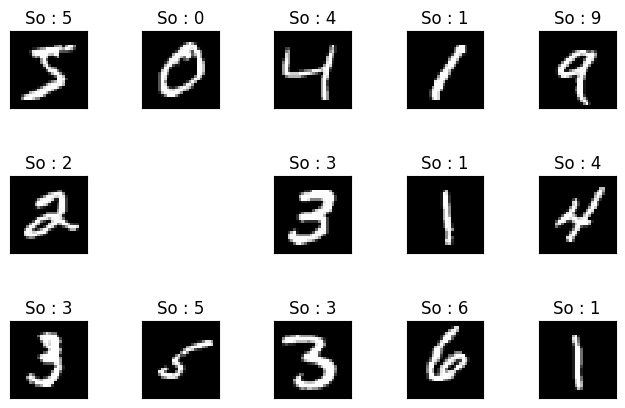

In [9]:
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i],cmap = 'gray',
             interpolation = 'none')
  plt.title('So : {}'.format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])


In [10]:
from keras import models
from keras.layers import Dense

In [11]:
from keras.models import Sequential

In [12]:
model = Sequential()

In [425]:
from keras.layers.serialization import activation
model.add(Dense(512,activation = 'relu',input_shape = (28*28,)))
model.add(Dense(10,activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
 dense_2 (Dense)             (None, 512)               5632      
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 417,812
Trainable params: 417,812
Non-trainable params: 0
_________________________________________________________________


In [14]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255

In [15]:
test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255

In [16]:
train_images.shape

(60000, 784)

In [17]:
test_images.shape

(10000, 784)

In [18]:
from keras.utils import to_categorical #ONE HOT ENCODING

In [19]:
train_labels = to_categorical(train_labels,10)

In [20]:
test_labels = to_categorical(test_labels,10)

In [21]:
model.compile(optimizer = 'rmsprop',loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [323]:
model.fit(train_images,train_labels,epochs = 10, batch_size = 128)

Epoch 1/10
469/469 [==============================] - 6s 12ms/step - loss: 2.9030e-04 - accuracy: 1.0000
Epoch 2/10
469/469 [==============================] - 4s 10ms/step - loss: 2.5824e-04 - accuracy: 1.0000
Epoch 3/10
469/469 [==============================] - 5s 12ms/step - loss: 2.3329e-04 - accuracy: 1.0000
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 2.1867e-04 - accuracy: 1.0000
Epoch 5/10
469/469 [==============================] - 5s 10ms/step - loss: 2.0142e-04 - accuracy: 1.0000
Epoch 6/10
469/469 [==============================] - 6s 12ms/step - loss: 1.8615e-04 - accuracy: 1.0000
Epoch 7/10
469/469 [==============================] - 4s 10ms/step - loss: 1.7419e-04 - accuracy: 1.0000
Epoch 8/10
469/469 [==============================] - 5s 10ms/step - loss: 1.6301e-04 - accuracy: 1.0000
Epoch 9/10
469/469 [==============================] - 5s 12ms/step - loss: 1.5459e-04 - accuracy: 1.0000
Epoch 10/10
469/469 [==============================] - 

In [324]:
test_loss,test_acc = model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0668 - accuracy: 0.9846


In [325]:
print('Do chinh xac tren tap kiem tra: ',test_acc)
print('Ham mat mat tren tap kiem tra: ',test_loss)

Do chinh xac tren tap kiem tra:  0.9846000075340271
Ham mat mat tren tap kiem tra:  0.066816546022892


In [326]:
model.save('model_mnist_1.h5')

In [327]:
from keras.saving.legacy.save import load_model
model11 = load_model('model_mnist_1.h5')

In [328]:
from keras.utils import load_img
import cv2 as cv
import numpy as np

In [329]:
model11.predict(test_images)

313/313 [==============================] - 1s 2ms/step


array([[3.4363576e-13, 4.2791639e-16, 1.3893480e-11, ..., 9.9999994e-01,
        6.2453372e-14, 2.4380203e-10],
       [2.0045873e-15, 4.1173194e-09, 9.9999994e-01, ..., 4.6119175e-24,
        3.3180447e-10, 2.4016948e-23],
       [5.0408525e-11, 9.9999851e-01, 2.9786935e-07, ..., 2.3208221e-07,
        8.5946658e-07, 2.6060066e-12],
       ...,
       [1.0990817e-22, 2.0964944e-19, 2.2583619e-23, ..., 4.1956397e-11,
        1.3940669e-12, 7.3752442e-11],
       [2.3904284e-12, 1.4914435e-17, 2.2453721e-16, ..., 5.8087371e-14,
        3.3896279e-07, 2.3256340e-17],
       [4.0707493e-16, 3.0037180e-20, 4.8316797e-17, ..., 3.2713017e-23,
        1.0566763e-18, 5.5865420e-21]], dtype=float32)

In [330]:
from skimage import color
from skimage import io
from keras.utils import img_to_array

In [653]:
file = 'test_3.jpg'
test_img = cv.imread(file,cv.IMREAD_GRAYSCALE)

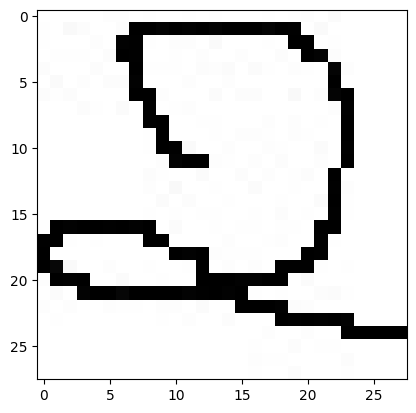

In [654]:
plt.imshow(test_img,cmap='gray')

In [655]:
#img = load_img(file,target_size = (28,28))

In [656]:
img = cv.resize(test_img, (28,28),interpolation=cv.INTER_LINEAR)
img = cv.bitwise_not(img)

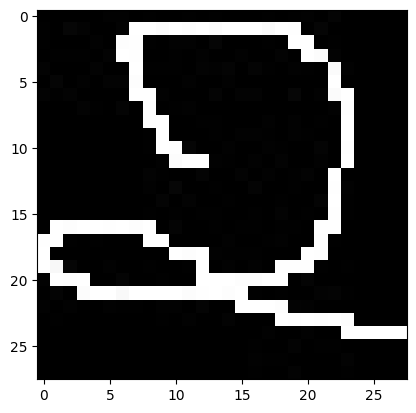

In [657]:
plt.imshow(img,cmap='gray')

In [658]:
from keras.utils.image_utils import img_to_array

In [659]:
img = img_to_array(img)

In [660]:
img.size

784

In [661]:
img = img.reshape(1,28*28)

In [662]:
#img = img.reshape(3,28*28)

In [663]:
img = img.astype('float32')

In [664]:
img = img/255

In [665]:
np.argmax(model11.predict(img),axis = 1)

1/1 [==============================] - 0s 22ms/step


array([5])